In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
#Importing the necessary libraries.

In [ ]:
""" DATA PREPROCESSING"""

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="darkgrid", palette="pastel")
plt.style.use('seaborn-v0_8-pastel')
# Adjusting the graph format.

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(3)
# Data set source link: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.size

782320

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.info()
# There are missing values in variables and some of their data types should be converted to the correct types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.00,19017143.24,10983108.39,2539.00,9471945.00,19677284.00,29152178.50,36487245.00
host_id,48895.00,67620010.65,78610967.03,2438.00,7822033.00,30793816.00,107434423.00,274321313.00
latitude,48895.00,40.73,0.05,40.50,40.69,40.72,40.76,40.91
longitude,48895.00,-73.95,0.05,-74.24,-73.98,-73.96,-73.94,-73.71
price,48895.00,152.72,240.15,0.00,69.00,106.00,175.00,10000.00
minimum_nights,48895.00,7.03,20.51,1.00,1.00,3.00,5.00,1250.00
number_of_reviews,48895.00,23.27,44.55,0.00,1.00,5.00,24.00,629.00
reviews_per_month,38843.00,1.37,1.68,0.01,0.19,0.72,2.02,58.50
calculated_host_listings_count,48895.00,7.14,32.95,1.00,1.00,1.00,2.00,327.00
availability_365,48895.00,112.78,131.62,0.00,0.00,45.00,227.00,365.00


In [ ]:
df.drop(["host_name", "name", "host_id","id", "last_review"], axis=1, inplace=True)
# Deleting above colums permanently.
df.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,1,365


In [ ]:
""" Outlier Detection and Cleaning """
# Imputation with Z-scores
integers = ["minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]

for column in integers:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()
  min_value = -((3*df[column].std()) + df[column].mean())

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()

  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean
    df[column].fillna(mean, inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)

  df[column] = df[column].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [ ]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()
  min_value = -((3*df[column].std()) + df[column].mean())

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()

  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean
    df[column].fillna(mean, inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)

  df[column] = df[column].astype("float64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  float64
 10  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.1+ MB


In [ ]:
df.groupby("room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    25409
Private room     Private room       22326
Shared room      Shared room         1160
Name: room_type, dtype: int64

In [ ]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
df.groupby("neighbourhood")["neighbourhood"].value_counts()

neighbourhood    neighbourhood  
Allerton         Allerton            42
Arden Heights    Arden Heights        4
Arrochar         Arrochar            21
Arverne          Arverne             77
Astoria          Astoria            900
                                   ... 
Windsor Terrace  Windsor Terrace    157
Woodhaven        Woodhaven           88
Woodlawn         Woodlawn            11
Woodrow          Woodrow              1
Woodside         Woodside           235
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
for key, value in df.groupby(by="neighbourhood")["neighbourhood"].value_counts().items():
  if value==1:
    df.loc[df["neighbourhood"]==key[0], "neighbourhood"] = "unknown_type"

df.groupby(by="neighbourhood")["neighbourhood"].value_counts()

neighbourhood    neighbourhood  
Allerton         Allerton            42
Arden Heights    Arden Heights        4
Arrochar         Arrochar            21
Arverne          Arverne             77
Astoria          Astoria            900
                                   ... 
Windsor Terrace  Windsor Terrace    157
Woodhaven        Woodhaven           88
Woodlawn         Woodlawn            11
Woodside         Woodside           235
unknown_type     unknown_type         6
Name: neighbourhood, Length: 216, dtype: int64

In [ ]:
df.isna().sum()
# There is no missing value detected.

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  float64
 10  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.1+ MB


In [ ]:
objects = ['neighbourhood_group', 'neighbourhood', 'room_type']

for column in objects:
  df[column] = df[column].astype("category")


In [ ]:
df.info()
# The missing values and data types are handled.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  float64 
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   reviews_per_month               48895 non-null  float64 
 9   calculated_host_listings_count  48895 non-null  float64 
 10  availability_365                48895 non-null  int64   
dtypes: category(3), float64(5), int64(3)
memory usage: 3.2 MB


In [ ]:
df.pivot_table(values=["number_of_reviews", "availability_365", "price", "reviews_per_month"],
               columns="room_type",
               aggfunc=np.mean)

# Shared rooms' availability is relatively higher. The reason might be: In shared rooms, the circulation of the guests
# are greater.
# Private rooms' review number is the highest. Guests might be reviewing the hosts more because they share much more with them since , in most case,
# they share the house. Although, reviews per month is highest for shared rooms.
# Logically, entire homes's price is way more higher than others.

room_type,Entire home/apt,Private room,Shared room
availability_365,111.92,111.20,162.00
number_of_reviews,18.32,18.22,14.44
price,190.40,83.72,66.25
reviews_per_month,1.24,1.29,1.33


In [ ]:
df.pivot_table(values=["number_of_reviews", "availability_365", "price", "reviews_per_month"],
               columns="neighbourhood_group",
               aggfunc=np.mean)


neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
availability_365,165.76,100.23,111.98,144.45,199.68
number_of_reviews,21.74,19.00,16.38,20.94,26.35
price,84.54,116.62,174.39,94.23,96.49
reviews_per_month,1.63,1.22,1.20,1.53,1.64


In [ ]:
""" DATA VISUALIZATION"""

<ipython-input-398-356e892b6cb4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".1f");


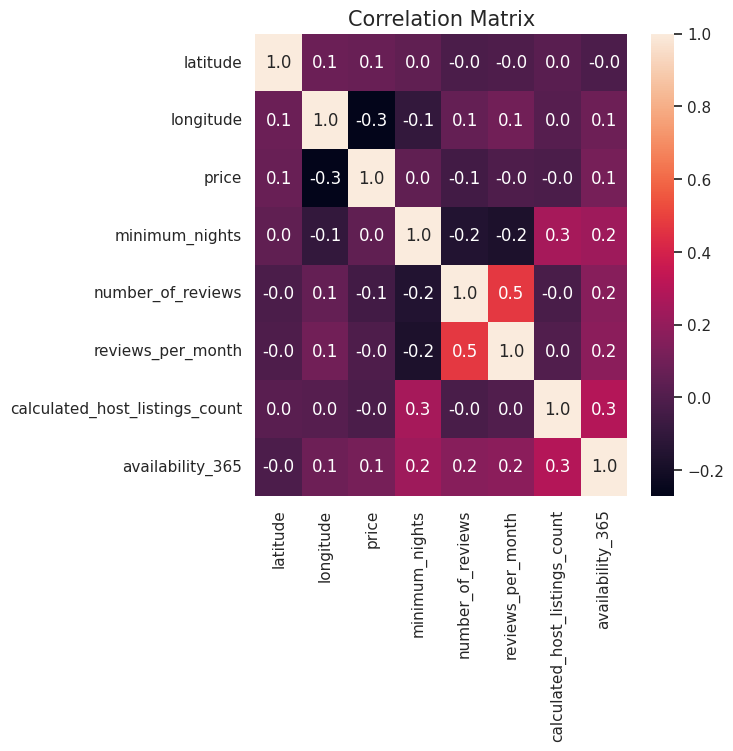

In [ ]:
plt.title("Correlation Matrix", fontsize = 15)
sns.heatmap(df.corr(), annot=True, fmt=".1f");
# There is no significant correlation between the variables.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.00,40.73,0.05,40.50,40.69,40.72,40.76,40.89
longitude,48895.00,-73.95,0.05,-74.24,-73.98,-73.96,-73.94,-73.71
price,48895.00,138.75,107.13,0.00,69.00,106.00,175.00,860.00
minimum_nights,48895.00,5.89,8.89,1.00,1.00,3.00,5.00,68.00
number_of_reviews,48895.00,18.18,29.34,0.00,1.00,5.00,20.00,156.00
reviews_per_month,48895.00,1.26,1.23,0.01,0.28,1.22,1.48,6.41
calculated_host_listings_count,48895.00,2.24,3.64,1.00,1.00,1.00,2.00,34.00
availability_365,48895.00,112.78,131.62,0.00,0.00,45.00,227.00,365.00


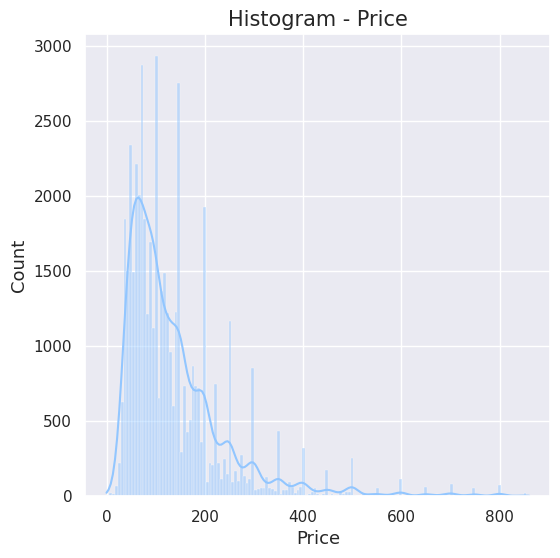

In [ ]:
sns.histplot(df["price"], kde=True)
plt.title("Histogram - Price", fontsize = 15)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Count', fontsize=13);
# The histogram is right-skewed. Mean of price is 138.75 as stated in the above table.

In [ ]:
df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

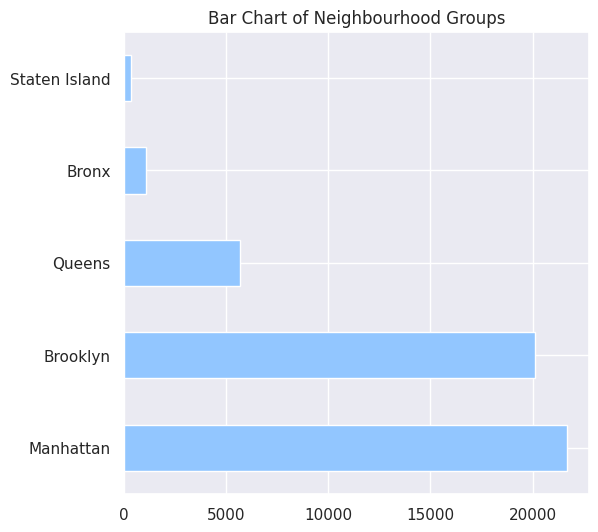

In [ ]:
df["neighbourhood_group"].value_counts().plot.barh().set_title("Bar Chart of Neighbourhood Groups");

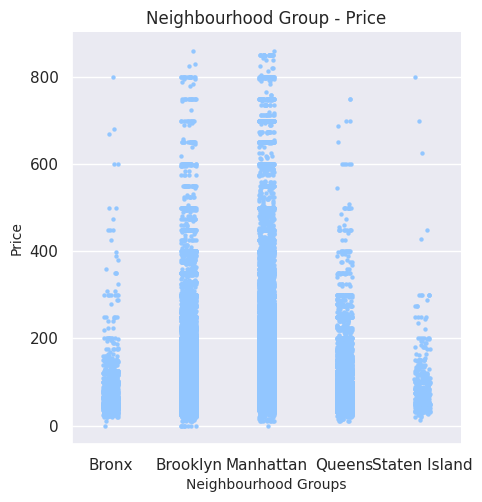

In [ ]:
sns.catplot(x="neighbourhood_group", y="price", data=df, s=10)
plt.title("Neighbourhood Group - Price")
plt.xlabel('Neighbourhood Groups', fontsize=10);
plt.ylabel('Price', fontsize=10);

In [ ]:
df["neighbourhood"].value_counts()

Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
                              ... 
Silver Lake                      2
Bay Terrace, Staten Island       2
Howland Hook                     2
Lighthouse Hill                  2
West Farms                       2
Name: neighbourhood, Length: 216, dtype: int64

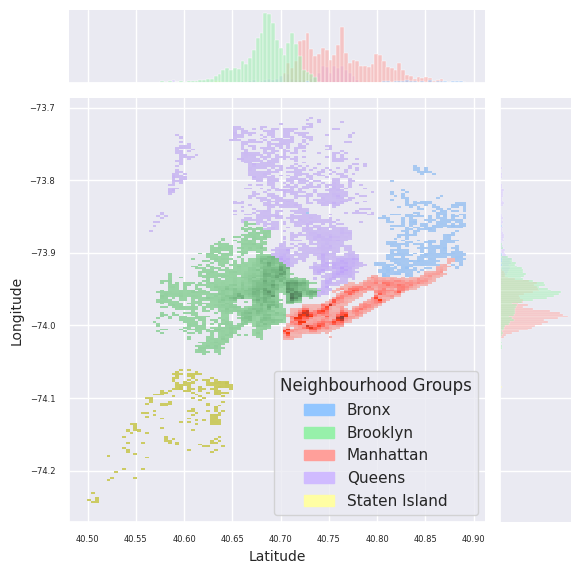

In [ ]:
joint_plot = sns.jointplot(data=df, x ="latitude" , y = "longitude", kind="hist", hue="neighbourhood_group")


plt.xlabel('Latitude', fontsize=10);
plt.ylabel('Longitude', fontsize=10);
plt.tick_params(axis='both', which='major', labelsize=6)

legend = joint_plot.ax_joint.get_legend()
legend.set_title("Neighbourhood Groups")

sns.move_legend(joint_plot.ax_joint, "lower right")

# From the value_caunts we can state that there are more house listings in Manhattan and Brooklyn.
# Also, border sides of the said neighbourhood_group values are more dense on the map regarding
# the below joint plot is generated by x = latitude and y = longitude.
# Thus, we can examine the price destributions of these neighbourhoods.

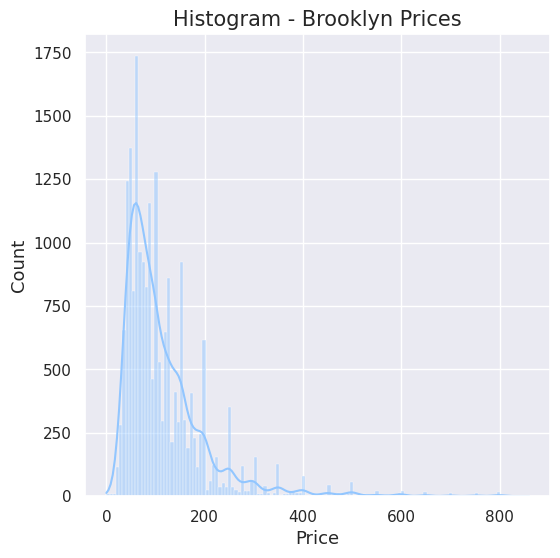

In [ ]:
# For Brooklyn
data = df[df['neighbourhood_group'] == "Brooklyn"]['price']
sns.histplot(data, kde=True)
plt.title("Histogram - Brooklyn Prices", fontsize = 15)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Count', fontsize=13);


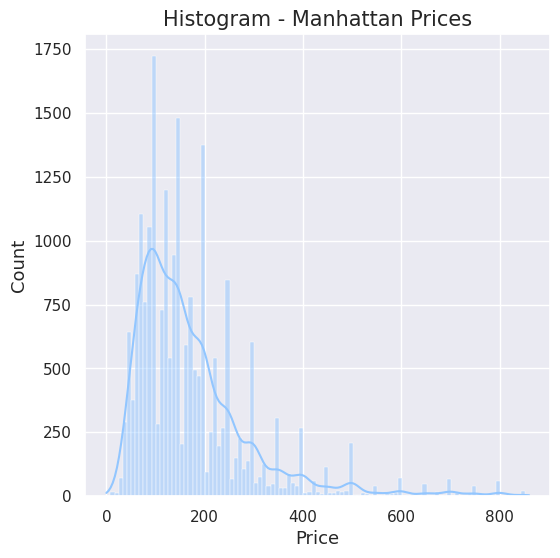

In [ ]:
# For Manhatta
data = df[df['neighbourhood_group'] == "Manhattan"]['price']
sns.histplot(data, kde=True)
plt.title("Histogram - Manhattan Prices", fontsize = 15)
plt.xlabel('Price', fontsize=13)
plt.ylabel('Count', fontsize=13);

# For Brooklyn, the graph is more skewed to right.

In [ ]:
df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<ipython-input-411-e8de6d3b98f3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("room_type").sum().plot.pie(y="price", autopct="%.2f%%", ylabel="Attribute to Price", legend=False, figsize=(6,6))


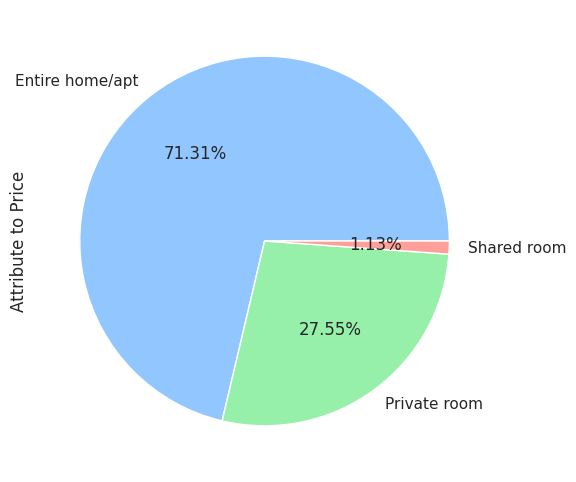

In [ ]:
df.groupby("room_type").sum().plot.pie(y="price", autopct="%.2f%%", ylabel="Attribute to Price", legend=False, figsize=(6,6))
plt.show()
# The share of entire home is bigger than the total of shared room and private room.

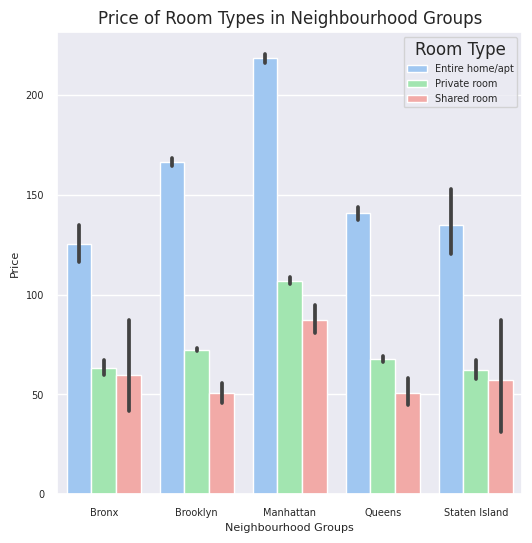

In [ ]:
sns.barplot(x="neighbourhood_group",
            y="price",
            hue="room_type",
            data=df)
plt.legend(title='Room Type', fontsize=7)
plt.xlabel('Neighbourhood Groups', fontsize=8);
plt.ylabel('Price', fontsize=8);
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("Price of Room Types in Neighbourhood Groups");
